In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
# 한글 폰트 적용
from matplotlib import rc
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 확인
fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 폰트 설정, 확인
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']

font_location = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [2]:
welfare_raw = pd.read_csv('welfare.csv')
welfare = welfare_raw.copy()
welfare

Unnamed: 0  성별    출생년도  혼인상테   종교     월급   직종번호   지역
0               0  여성  1945.0   2.0  1.0    NaN    NaN  1.0
1               1  남성  1948.0   2.0  2.0  172.0  942.0  1.0
2               2  남성  1942.0   3.0  1.0  100.0  762.0  1.0
3               3  남성  1962.0   1.0  1.0  268.0  855.0  1.0
4               4  여성  1963.0   1.0  1.0  140.0  399.0  1.0
...           ...  ..     ...   ...  ...    ...    ...  ...
16586       16586  남성  1975.0   1.0  2.0  833.0  222.0  2.0
16587       16587  여성  1976.0   1.0  2.0    NaN    NaN  2.0
16588       16588  여성  2009.0   0.0  2.0    NaN    NaN  2.0
16589       16589  남성  1964.0   1.0  1.0    NaN  248.0  6.0
16590       16590  여성  1964.0   1.0  1.0    NaN    NaN  6.0

[16591 rows x 8 columns]

In [3]:
welfare = welfare.drop(['Unnamed: 0'], axis=1)
welfare

성별    출생년도  혼인상테   종교     월급   직종번호   지역
0      여성  1945.0   2.0  1.0    NaN    NaN  1.0
1      남성  1948.0   2.0  2.0  172.0  942.0  1.0
2      남성  1942.0   3.0  1.0  100.0  762.0  1.0
3      남성  1962.0   1.0  1.0  268.0  855.0  1.0
4      여성  1963.0   1.0  1.0  140.0  399.0  1.0
...    ..     ...   ...  ...    ...    ...  ...
16586  남성  1975.0   1.0  2.0  833.0  222.0  2.0
16587  여성  1976.0   1.0  2.0    NaN    NaN  2.0
16588  여성  2009.0   0.0  2.0    NaN    NaN  2.0
16589  남성  1964.0   1.0  1.0    NaN  248.0  6.0
16590  여성  1964.0   1.0  1.0    NaN    NaN  6.0

[16591 rows x 7 columns]

In [4]:
# 2. 나이에 따른 월급의 차이
# 1) 변수 검토 및 전처리(나이, 월급)
# 1-1) 나이 변수 확인(결측치, 이상치 확인)
# 1-1. 성별 변수 확인(결속치, 이상치 확인)
welfare['성별'].dtypes # dtypes('float64')
welfare['성별'].value_counts()

# 태어난 년도 변수의 타입 확인
welfare['출생년도'].dtypes # dtype('float64')

# 태어난 년도 변수의 요약 통계량 확인
# 개수: 16591 -> 결측치 없음.
# 태어난 년도의 범위: 1906~2021(2022년 기준)
welfare['출생년도'].describe()

count    16591.000000
mean      1969.066241
std         24.158054
min       1906.000000
25%       1949.000000
50%       1965.000000
75%       1988.000000
max       2021.000000
Name: 출생년도, dtype: float64

<Axes: xlabel='출생년도', ylabel='Count'>

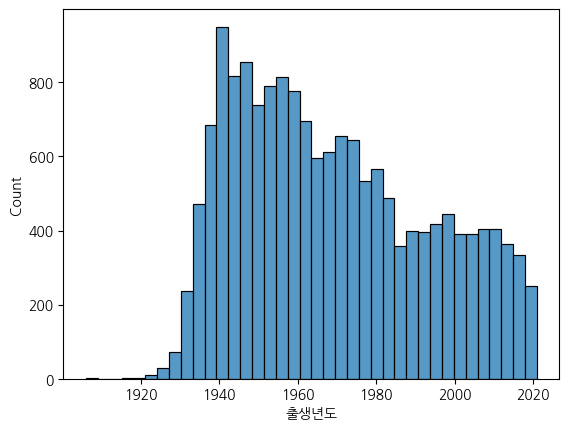

In [5]:
# 태어난 년도의 분포를 그래프로 확인
sns.histplot(data=welfare, x='출생년도')

In [6]:
# 이상치 데이터 확인, 개수: 16591, 범위: 1906~2021, 무응답(9999)이 없음
welfare['출생년도'].describe()

# 이상치 처리
welfare['출생년도'] = np.where(welfare['출생년도'] == 9999, np.nan, welfare['출생년도'])
welfare

성별    출생년도  혼인상테   종교     월급   직종번호   지역
0      여성  1945.0   2.0  1.0    NaN    NaN  1.0
1      남성  1948.0   2.0  2.0  172.0  942.0  1.0
2      남성  1942.0   3.0  1.0  100.0  762.0  1.0
3      남성  1962.0   1.0  1.0  268.0  855.0  1.0
4      여성  1963.0   1.0  1.0  140.0  399.0  1.0
...    ..     ...   ...  ...    ...    ...  ...
16586  남성  1975.0   1.0  2.0  833.0  222.0  2.0
16587  여성  1976.0   1.0  2.0    NaN    NaN  2.0
16588  여성  2009.0   0.0  2.0    NaN    NaN  2.0
16589  남성  1964.0   1.0  1.0    NaN  248.0  6.0
16590  여성  1964.0   1.0  1.0    NaN    NaN  6.0

[16591 rows x 7 columns]

In [7]:
# 결측치 확인 - 0
welfare['출생년도'].isna().sum()

0

In [8]:
# 나이 파생변수 생성, 출생년도를 사용
welfare = welfare.assign(나이 = 2022 - welfare['출생년도'])
welfare

성별    출생년도  혼인상테   종교     월급   직종번호   지역    나이
0      여성  1945.0   2.0  1.0    NaN    NaN  1.0  77.0
1      남성  1948.0   2.0  2.0  172.0  942.0  1.0  74.0
2      남성  1942.0   3.0  1.0  100.0  762.0  1.0  80.0
3      남성  1962.0   1.0  1.0  268.0  855.0  1.0  60.0
4      여성  1963.0   1.0  1.0  140.0  399.0  1.0  59.0
...    ..     ...   ...  ...    ...    ...  ...   ...
16586  남성  1975.0   1.0  2.0  833.0  222.0  2.0  47.0
16587  여성  1976.0   1.0  2.0    NaN    NaN  2.0  46.0
16588  여성  2009.0   0.0  2.0    NaN    NaN  2.0  13.0
16589  남성  1964.0   1.0  1.0    NaN  248.0  6.0  58.0
16590  여성  1964.0   1.0  1.0    NaN    NaN  6.0  58.0

[16591 rows x 8 columns]

In [9]:
# 1) 월급 변수 확인(결측치, 이상치 확인)
welfare['월급'].dtype # dtypes('float64')

# 결측치 아닌값의 개수: 5633
# 월급의 범위: 0 ~ 2017, 평균: 275(만원), 중앙값: 236(만원)
welfare['월급'].describe()

count    5633.000000
mean      275.647080
std       214.807673
min         0.000000
25%       125.000000
50%       236.000000
75%       363.000000
max      2017.000000
Name: 월급, dtype: float64

In [10]:
# 2) 분석표(통계요약표)
age_income = welfare.dropna(subset=['월급']) \
                    .groupby('나이', as_index=False) \
                    .agg(평균월급=('월급', 'mean'))
age_income

나이        평균월급
0   19.0  171.666667
1   20.0  132.555556
2   21.0  149.409091
3   22.0  149.810811
4   23.0  166.413043
..   ...         ...
69  88.0   26.714286
70  89.0   27.000000
71  90.0   27.000000
72  91.0   27.000000
73  93.0   27.000000

[74 rows x 2 columns]

<Axes: xlabel='나이', ylabel='평균월급'>

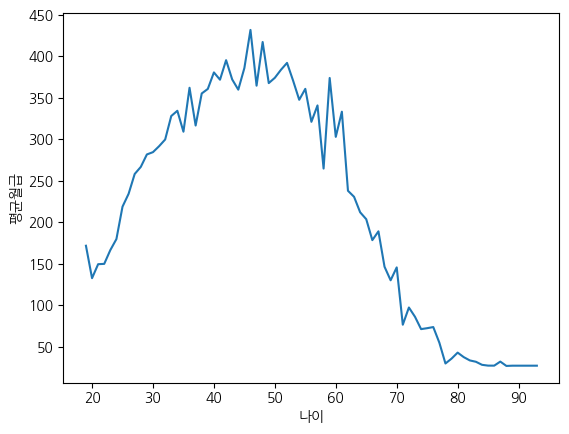

In [11]:
# 3) 시각화(hist, bar, line)
sns.lineplot(data=age_income, x='나이', y='평균월급')

In [12]:
# 데이터프레임에서 모든 열과 행을 확인하는 방법
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# 원래의 열과 행을 확인하는 방법으로 되돌리기
# pd.options.display.max_columns = 20
# pd.options.display.max_rows = 60

pd.set_option('display.max_rows', None) # 모든 행 확인
age_income

나이        평균월급
0   19.0  171.666667
1   20.0  132.555556
2   21.0  149.409091
3   22.0  149.810811
4   23.0  166.413043
5   24.0  179.728814
6   25.0  218.783784
7   26.0  234.314286
8   27.0  258.217391
9   28.0  266.752475
10  29.0  281.770115
11  30.0  284.558140
12  31.0  291.683168
13  32.0  299.807692
14  33.0  328.118812
15  34.0  334.444444
16  35.0  309.200000
17  36.0  362.200000
18  37.0  316.637500
19  38.0  355.325301
20  39.0  360.809091
21  40.0  380.717949
22  41.0  371.929204
23  42.0  395.480000
24  43.0  372.267176
25  44.0  359.923664
26  45.0  386.000000
27  46.0  431.972727
28  47.0  364.729927
29  48.0  417.386861
30  49.0  367.821705
31  50.0  374.230769
32  51.0  383.852113
33  52.0  392.202899
34  53.0  370.734513
35  54.0  347.700935
36  55.0  360.901786
37  56.0  321.129870
38  57.0  340.904255
39  58.0  264.752294
40  59.0  374.018692
41  60.0  302.966667
42  61.0  333.329897
43  62.0  237.970874
44  63.0  230.700000
45  64.0  212.011765
46  65.0  203.675676
47  66.0  178.420290
48  67.0  189.046875
49  68.0  146.343750
50  69.0  130.000000
51  70.0  145.551282
52  71.0   76.413043
53  72.0   97.180328
54  73.0   86.000000
55  74.0   71.115385
56  75.0   72.232877
57  76.0   73.592593
58  77.0   54.688889
59  78.0   29.650000
60  79.0   35.515152
61  80.0   42.762500
62  81.0   37.327273
63  82.0   33.340909
64  83.0   31.717391
65  84.0   28.047619
66  85.0   27.080000
67  86.0   27.050000
68  87.0   31.928571
69  88.0   26.714286
70  89.0   27.000000
71  90.0   27.000000
72  91.0   27.000000
73  93.0   27.000000

In [13]:
# 4) 결과 분석
# 20대 초반에는 132만원 정도의 월급을, 이후로 지속적으로 증가하다가 30대에는 285만원 정도의 월급을,
# 40대 중반에는 가장 많은 432만원 정도의 월급을, 이후로는 지속적으로 감소하다가 60대 303만원의 월급을,
# 70대에 20대와 비슷한 145만원 정도의 월급을, 80대 이후로는 50만원에 못미치는 월급을 받고 있다는 것을 알 수 있다.

In [14]:
welfare.to_csv('welfare.csv') # csv 파일로 저장

In [15]:
welfare = pd.read_csv('welfare.csv')
welfare

Unnamed: 0  성별    출생년도  혼인상테   종교      월급    직종번호   지역     나이
0               0  여성  1945.0   2.0  1.0     NaN     NaN  1.0   77.0
1               1  남성  1948.0   2.0  2.0   172.0   942.0  1.0   74.0
2               2  남성  1942.0   3.0  1.0   100.0   762.0  1.0   80.0
3               3  남성  1962.0   1.0  1.0   268.0   855.0  1.0   60.0
4               4  여성  1963.0   1.0  1.0   140.0   399.0  1.0   59.0
5               5  여성  2003.0   5.0  1.0     NaN     NaN  1.0   19.0
6               6  남성  1927.0   1.0  1.0     NaN     NaN  1.0   95.0
7               7  여성  1934.0   1.0  1.0     NaN     NaN  1.0   88.0
8               8  여성  1940.0   2.0  1.0    27.0   941.0  2.0   82.0
9               9  여성  1970.0   3.0  1.0     NaN   151.0  1.0   52.0
10             10  여성  1992.0   5.0  2.0     NaN     NaN  1.0   30.0
11             11  남성  1940.0   1.0  2.0     NaN     NaN  1.0   82.0
12             12  여성  1941.0   1.0  2.0     NaN     NaN  1.0   81.0
13             13  남성  1962.0   5.0  1.0     NaN     NaN  1.0   60.0
14             14  남성  1978.0   1.0  2.0   267.0   399.0  1.0   44.0
15             15  여성  1975.0   1.0  2.0   217.0   254.0  1.0   47.0
16             16  여성  2004.0   0.0  2.0     NaN     NaN  1.0   18.0
17             17  여성  2008.0   0.0  2.0     NaN     NaN  1.0   14.0
18             18  남성  1941.0   1.0  1.0     NaN     NaN  1.0   81.0
19             19  여성  1942.0   1.0  1.0   100.0   510.0  1.0   80.0
20             20  남성  1964.0   5.0  2.0     NaN     NaN  1.0   58.0
21             21  남성  1975.0   5.0  1.0     NaN   521.0  1.0   47.0
22             22  여성  1961.0   1.0  1.0   117.0   952.0  1.0   61.0
23             23  남성  1961.0   1.0  2.0   383.0   783.0  1.0   61.0
24             24  여성  1986.0   5.0  2.0   283.0   399.0  1.0   36.0
25             25  여성  1962.0   1.0  1.0   150.0   941.0  1.0   60.0
26             26  여성  1985.0   3.0  2.0     NaN     NaN  1.0   37.0
27             27  남성  1992.0   5.0  2.0   220.0   286.0  1.0   30.0
28             28  남성  1952.0   1.0  2.0   310.0   783.0  1.0   70.0
29             29  여성  1961.0   3.0  1.0     NaN   951.0  2.0   61.0
30             30  여성  1982.0   1.0  2.0     NaN   531.0  1.0   40.0
31             31  남성  1984.0   1.0  2.0     NaN   531.0  1.0   38.0
32             32  여성  2020.0   0.0  2.0     NaN     NaN  1.0    2.0
33             33  남성  1971.0   5.0  2.0   350.0   873.0  7.0   51.0
34             34  여성  1945.0   2.0  1.0     NaN     NaN  7.0   77.0
35             35  남성  1943.0   2.0  1.0     NaN     NaN  1.0   79.0
36             36  남성  1972.0   1.0  1.0     NaN     NaN  1.0   50.0
37             37  여성  1974.0   1.0  1.0   655.0   111.0  1.0   48.0
38             38  여성  2006.0   0.0  1.0     NaN     NaN  1.0   16.0
39             39  여성  2006.0   0.0  1.0     NaN     NaN  1.0   16.0
40             40  여성  1954.0   3.0  2.0   272.0   421.0  1.0   68.0
41             41  여성  1941.0   2.0  1.0     NaN     NaN  1.0   81.0
42             42  남성  1972.0   1.0  2.0   387.0   313.0  1.0   50.0
43             43  여성  1973.0   1.0  2.0   417.0   313.0  1.0   49.0
44             44  남성  2004.0   0.0  2.0     NaN     NaN  1.0   18.0
45             45  여성  1936.0   2.0  2.0     NaN     NaN  1.0   86.0
46             46  남성  1968.0   5.0  1.0   260.0   842.0  2.0   54.0
47             47  여성  1940.0   6.0  1.0     NaN     NaN  2.0   82.0
48             48  여성  1982.0   1.0  1.0    40.0   421.0  2.0   40.0
49             49  남성  1976.0   1.0  2.0   310.0   873.0  2.0   46.0
50             50  남성  2010.0   0.0  1.0     NaN     NaN  2.0   12.0
51             51  여성  2012.0   0.0  1.0     NaN     NaN  2.0   10.0
52             52  여성  1937.0   3.0  1.0     NaN     NaN  1.0   85.0
53             53  남성  1959.0   1.0  2.0   290.0   852.0  1.0   63.0
54             54  여성  1967.0   1.0  2.0   160.0   930.0  1.0   55.0
55             55  여성  1995.0   5.0  2.0     NaN     NaN  1.0   27.0
56             56  여성  1998.0   5.0  2.0   180.0   521.0  1.0   24.0
57   